## Step1 Importing all the required lib 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Step2 Import the dataset

In [4]:
data = pd.read_csv('data1.csv')

In [6]:
##Cehck the head of the dataset
data.head()

,Income.Group,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Sex,Hours.Per.Week
0,<=50K,1,39.0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,Male,40.0
1,<=50K,2,50.0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Male,13.0
2,<=50K,3,38.0,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,Male,40.0
3,<=50K,4,53.0,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Male,40.0
4,<=50K,5,28.0,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Female,40.0


## Step 3 Handle Missing Data

In [8]:
##check if there are null values in any of the columns
data.isnull().sum()

Income.Group       0
ID                 0
Age               45
Workclass          0
Education          0
Marital.Status     0
Occupation         0
Relationship       0
Sex                0
Hours.Per.Week    60
dtype: int64

#### there are some null values in 'Age' and 'Hours.per.week' columns, so we need to handle those missing values using Imputer

In [14]:
from sklearn.preprocessing import Imputer
## we can use 'mean' as the strategy for age and hours per week missing data
imputer_obj = Imputer(missing_values='NaN',strategy='mean')
imputer_obj.fit(data.iloc[:,2:3])
data.iloc[:,2:3]=imputer_obj.transform(data.iloc[:,2:3])

In [15]:

imputer_obj = Imputer(missing_values='NaN',strategy='mean')
imputer_obj.fit(data.iloc[:,2:3])
data.iloc[:,9:10]=imputer_obj.transform(data.iloc[:,9:10])

In [16]:
data.isnull().sum()

Income.Group      0
ID                0
Age               0
Workclass         0
Education         0
Marital.Status    0
Occupation        0
Relationship      0
Sex               0
Hours.Per.Week    0
dtype: int64

In [17]:
## now we have cleaned the data and there are no missing values in the data


## Step 4 Visualizing the data

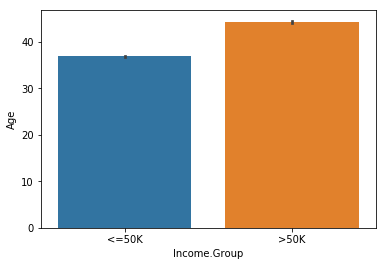

In [20]:
sns.barplot(data['Income.Group'],data['Age'])

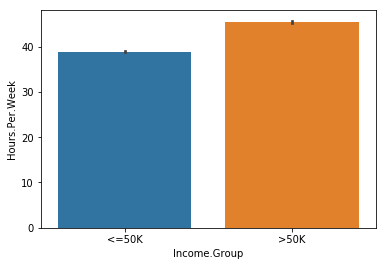

In [22]:
sns.barplot(data['Income.Group'],data['Hours.Per.Week'])

## Step 5 Handeling Categorical Data

In [35]:
##get the names of columns which have the categorical data
categorical_data=data.dtypes[data.dtypes=='object'].index
categorical_data

Index(['Income.Group', 'Workclass', 'Education', 'Marital.Status',
       'Occupation', 'Relationship', 'Sex'],
      dtype='object')

In [37]:
##using the label encoder to encode the data
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for x in categorical_data:
    data[x]=encoder.fit_transform(data[x])
data.head()    
    

,Income.Group,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Sex,Hours.Per.Week
0,0,1,39.0,6,9,4,0,1,1,40.0
1,0,2,50.0,5,9,2,3,0,1,13.0
2,0,3,38.0,3,11,0,5,1,1,40.0
3,0,4,53.0,3,1,2,5,0,1,40.0
4,0,5,28.0,3,9,2,9,5,0,40.0


## Step 6 Creating the KNN Model

In [41]:
X=data.iloc[:, 1:]
y=data.iloc[:,0:1]

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [116]:
from sklearn.neighbors import KNeighborsClassifier
reg = KNeighborsClassifier(n_neighbors=8)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [117]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[7089  347]
 [2092  241]]


In [118]:
from sklearn.metrics import accuracy_score
result = accuracy_score(y_test, y_pred)*100
result

75.03326850240558

## Step 7 Tuning the model to get better accuracy

### By using KNN we get accuracy of arround 74% when k value is 2 now let use choose the optimum k value

In [90]:
from sklearn.neighbors import KNeighborsClassifier
errors = []
y_test1=y_test.iloc[:,0].values
for i in range(1,40):
    reg = KNeighborsClassifier(n_neighbors=i)
    reg.fit(X_train, y_train)
    y_predi = reg.predict(X_test)
    errors.append(np.mean(y_predi != y_test1))
    print('The Error Rate for ',i,' iteratinon is--- ', np.mean(y_predi != y_test1))

C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


The Error Rate for  1  iteratinon is---  0.32603132357457265
The Error Rate for  2  iteratinon is---  0.2564233800798444


C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


The Error Rate for  3  iteratinon is---  0.2897942471081994
The Error Rate for  4  iteratinon is---  0.25785648479885354


C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


The Error Rate for  5  iteratinon is---  0.2772033985054765
The Error Rate for  6  iteratinon is---  0.25017913808987613


C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


The Error Rate for  7  iteratinon is---  0.2637936329204627
The Error Rate for  8  iteratinon is---  0.24966731497594433
The Error Rate for  9  iteratinon is---  0.2576517555532808


C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


The Error Rate for  10  iteratinon is---  0.24772238714300338
The Error Rate for  11  iteratinon is---  0.2517146074316716


C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


The Error Rate for  12  iteratinon is---  0.24628928242399425
The Error Rate for  13  iteratinon is---  0.24925785648479884


C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


The Error Rate for  14  iteratinon is---  0.24495854232777153
The Error Rate for  15  iteratinon is---  0.24792711638857612


C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


The Error Rate for  16  iteratinon is---  0.24373016685433513
The Error Rate for  17  iteratinon is---  0.245368000818917


C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


The Error Rate for  18  iteratinon is---  0.2429112498720442
The Error Rate for 

C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


 19  iteratinon is---  0.24403726072269424


C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


The Error Rate for  20  iteratinon is---  0.2415805097758215


C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


The Error Rate for  21  iteratinon is---  0.24229706213532604
The Error Rate for  22  iteratinon is---  0.2409663220391033


C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


The Error Rate for  23  iteratinon is---  0.24127341590746237
The Error Rate for  24  iteratinon is---  0.2397379465656669


C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


The Error Rate for  25  iteratinon is---  0.24035213430238508
The Error Rate for  26  iteratinon is---  0.2386119357150169


C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


The Error Rate for  27  iteratinon is---  0.23902139420616236
The Error Rate for  28  iteratinon is---  0.23840720646944416


C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


The Error Rate for  29  iteratinon is---  0.238919029583376
The Error Rate for  30  iteratinon is---  0.23850957109223053


C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


The Error Rate for  31  iteratinon is---  0.23902139420616236
The Error Rate for 

C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


 32  iteratinon is---  0.23840720646944416
The Error Rate for 

C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


 33  iteratinon is---  0.23881666496058962
The Error Rate for  34  iteratinon is---  0.2386119357150169


C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


The Error Rate for  35  iteratinon is---  0.23932848807452145


C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


The Error Rate for  36  iteratinon is---  0.2386119357150169


C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


The Error Rate for  37  iteratinon is---  0.238919029583376


C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


The Error Rate for  38  iteratinon is---  0.23850957109223053


C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


The Error Rate for  39  iteratinon is---  0.23850957109223053


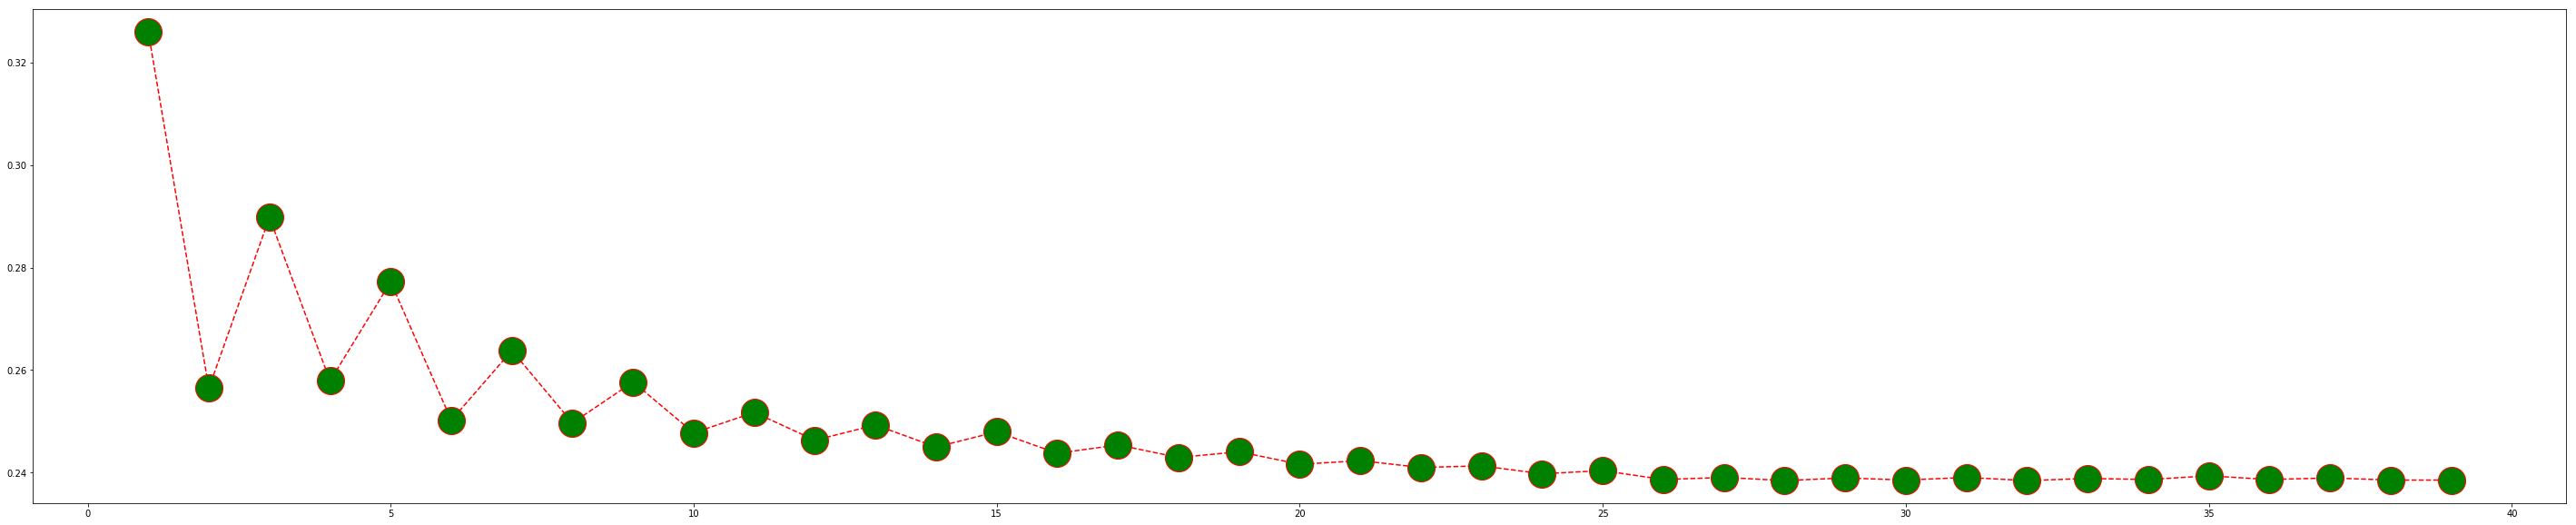

In [89]:
plt.figure(figsize=(50,10))

plt.plot(range(1,40),errors,color='red',linestyle='dashed',marker='o',markerfacecolor='green',markersize=30)



## From above grpah we can see that error is less above k=5, so now for our model we can use the k value as 5
## For k = 5 we got accuracy arround 74% and when we used k=8 we got an accuracy of 75% and now our model is ready to be used